In [1]:
import pandas as pd
import json
from pandas import Series, DataFrame

In [2]:
data = pd.read_json("yelp_academic_dataset_business.json", lines = True)
data

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,921 Pearl St,Boulder,CO,80302,40.017544,-105.283348,4.0,86,1,"{'RestaurantsTableService': 'True', 'WiFi': 'u...","Gastropubs, Food, Beer Gardens, Restaurants, B...","{'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'..."
1,tCbdrRPZA0oiIYSmHG3J0w,Flying Elephants at PDX,7000 NE Airport Way,Portland,OR,97218,45.588906,-122.593331,4.0,126,1,"{'RestaurantsTakeOut': 'True', 'RestaurantsAtt...","Salad, Soup, Sandwiches, Delis, Restaurants, C...","{'Monday': '5:0-18:0', 'Tuesday': '5:0-17:0', ..."
2,bvN78flM8NLprQ1a1y5dRg,The Reclaimory,4720 Hawthorne Ave,Portland,OR,97214,45.511907,-122.613693,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Antiques, Fashion, Used, Vintage & Consignment...","{'Thursday': '11:0-18:0', 'Friday': '11:0-18:0..."
3,oaepsyvc0J17qwi8cfrOWg,Great Clips,2566 Enterprise Rd,Orange City,FL,32763,28.914482,-81.295979,3.0,8,1,"{'RestaurantsPriceRange2': '1', 'BusinessAccep...","Beauty & Spas, Hair Salons",None
4,PE9uqAjdw0E4-8mjGl3wVA,Crossfit Terminus,1046 Memorial Dr SE,Atlanta,GA,30316,33.747027,-84.353424,4.0,14,1,"{'GoodForKids': 'False', 'BusinessParking': '{...","Gyms, Active Life, Interval Training Gyms, Fit...","{'Monday': '16:0-19:0', 'Tuesday': '16:0-19:0'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160580,D2mHoIDXx9N8mS1pGoKV9Q,Eleven Oaks Realty,,Austin,TX,78701,30.272921,-97.744386,4.0,8,1,None,"Real Estate, Real Estate Services, Home Servic...","{'Monday': '9:0-19:0', 'Tuesday': '9:0-19:0', ..."
160581,bQX-kwVTyZgcdZGEPzce6Q,Webb's Honey,21777 State Rd 520,Orlando,FL,32833,28.499836,-81.047478,4.5,18,1,"{'RestaurantsTakeOut': 'True', 'RestaurantsPri...","Health Markets, Food, Specialty Food, Grocery","{'Monday': '10:0-18:0', 'Tuesday': '10:0-18:0'..."
160582,wvFZ06nmPmQ2-IVoPqVYLA,Painting with a Twist,2164 S Chickasaw Trl,Orlando,FL,32825,28.511615,-81.270020,5.0,8,0,"{'DogsAllowed': 'False', 'ByAppointmentOnly': ...","Arts & Entertainment, Paint & Sip, Art Classes...","{'Monday': '0:0-0:0', 'Wednesday': '12:0-17:0'..."
160583,GB75wPibj3IjNauaoCxyGA,Havana Cafe,910 NW 14th St,Portland,OR,97209,45.529647,-122.685153,4.0,10,1,"{'RestaurantsTakeOut': 'True', 'RestaurantsDel...","Cuban, Sandwiches, Restaurants, Cafes",None


In [3]:
df_new = data[data["categories"].str.contains("Restaurants", na = False)]
df_new.dropna(subset = ['attributes'], inplace = True)
df_new.head()

<ipython-input-3-7de17d2016bc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.dropna(subset = ['attributes'], inplace = True)


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,921 Pearl St,Boulder,CO,80302,40.017544,-105.283348,4.0,86,1,"{'RestaurantsTableService': 'True', 'WiFi': 'u...","Gastropubs, Food, Beer Gardens, Restaurants, B...","{'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'..."
1,tCbdrRPZA0oiIYSmHG3J0w,Flying Elephants at PDX,7000 NE Airport Way,Portland,OR,97218,45.588906,-122.593331,4.0,126,1,"{'RestaurantsTakeOut': 'True', 'RestaurantsAtt...","Salad, Soup, Sandwiches, Delis, Restaurants, C...","{'Monday': '5:0-18:0', 'Tuesday': '5:0-17:0', ..."
5,D4JtQNTI4X3KcbzacDJsMw,Bob Likes Thai Food,3755 Main St,Vancouver,BC,V5V,49.251342,-123.101333,3.5,169,1,"{'GoodForKids': 'True', 'Alcohol': 'u'none'', ...","Restaurants, Thai","{'Monday': '17:0-21:0', 'Tuesday': '17:0-21:0'..."
12,HPA_qyMEddpAEtFof02ixg,Mr G's Pizza & Subs,474 Lowell St,Peabody,MA,01960,42.541155,-70.973438,4.0,39,1,"{'RestaurantsGoodForGroups': 'True', 'HasTV': ...","Food, Pizza, Restaurants","{'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'..."
13,ufCxltuh56FF4-ZFZ6cVhg,Sister Honey's,247 E Michigan St,Orlando,FL,32806,28.513265,-81.374707,4.5,135,1,"{'BusinessParking': '{'garage': False, 'street...","Restaurants, American (New), Bakeries, Dessert...","{'Tuesday': '11:0-18:0', 'Wednesday': '11:0-18..."


In [4]:
df_ohio = df_new[df_new['state']== 'OH']
df_ohio

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
132,5eq56X-e9YbAKmHgUOyXSg,Hunan Lion,2038 Crown Plaza,Columbus,OH,43220,40.065378,-83.071415,4.0,162,1,"{'GoodForKids': 'True', 'RestaurantsGoodForGro...","Chinese, Restaurants","{'Monday': '11:30-22:0', 'Tuesday': '11:30-22:..."
144,Fl_7YDOMt58rTNHa7p2G4w,Waffle House,3085 Broadway,Urbancrest,OH,43123,39.900855,-83.078730,3.0,8,1,"{'OutdoorSeating': 'False', 'RestaurantsAttire...","Restaurants, Waffles, American (New), Diners, ...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W..."
149,vecuat0jOia-CJveW3ngDw,Schmidt's Sausage Haus,240 E Kossuth St,Columbus,OH,43206,39.946268,-82.991044,4.0,1354,1,"{'GoodForKids': 'True', 'HasTV': 'False', 'Res...","Caterers, Bars, Sandwiches, Pubs, Restaurants,...","{'Monday': '0:0-0:0', 'Tuesday': '11:0-16:0', ..."
218,ZaMMUcOIngBCgxuKxFzfqg,McDonald's,1524 Georgesville Rd,Columbus,OH,43228,39.919976,-83.125822,2.0,25,1,"{'RestaurantsTakeOut': 'True', 'NoiseLevel': '...","Fast Food, Restaurants, Food, Coffee & Tea, Bu...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W..."
280,C1Jkjsqoz1AsYJy28IosQg,La Michoacana Market,3160 S Hamilton Rd,Columbus,OH,43232,39.912139,-82.880234,3.5,7,1,"{'Caters': 'True', 'BusinessAcceptsCreditCards...","International Grocery, Meat Shops, Specialty F...","{'Monday': '8:0-21:0', 'Tuesday': '8:0-21:0', ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160447,hNpnUFVW4Xm5CoShgpey7A,Bistro 2110 At the Blackwell,2110 Tuttle Park Pl,Columbus,OH,43210,40.005023,-83.016595,3.5,35,1,"{'BusinessParking': '{'garage': False, 'street...","American (New), Restaurants",None
160482,cDA3nKRBdx4IH_hAYGtcVg,The Early Bird Food Truck,,Columbus,OH,43201,40.006611,-83.002972,5.0,7,0,"{'GoodForKids': 'True', 'GoodForMeal': '{'dess...","Breakfast & Brunch, Bakeries, Food Trucks, Foo...",None
160535,furx9nQDLnKSx3gOxgbGHA,Grinders of Gahanna,921 E Johnstown Rd,Columbus,OH,43230,40.042004,-82.863357,3.5,19,0,"{'BusinessParking': '{'garage': False, 'street...","Food, Sandwiches, Desserts, Italian, Restauran...","{'Monday': '10:0-21:0', 'Tuesday': '10:0-21:0'..."
160539,pFRZvauzfaHeymvSGwNBXw,Senor Tequilas,1993 Hard Rd,Columbus,OH,43235,40.116903,-83.068716,3.0,81,0,"{'RestaurantsTakeOut': 'True', 'WiFi': ''free'...","Bars, Nightlife, Event Planning & Services, Re...","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'..."


In [5]:
df_attr = df_new[['business_id', 'attributes']]
df_attr.head()

,business_id,attributes
0,6iYb2HFDywm3zjuRg0shjw,"{'RestaurantsTableService': 'True', 'WiFi': 'u..."
1,tCbdrRPZA0oiIYSmHG3J0w,"{'RestaurantsTakeOut': 'True', 'RestaurantsAtt..."
5,D4JtQNTI4X3KcbzacDJsMw,"{'GoodForKids': 'True', 'Alcohol': 'u'none'', ..."
12,HPA_qyMEddpAEtFof02ixg,"{'RestaurantsGoodForGroups': 'True', 'HasTV': ..."
13,ufCxltuh56FF4-ZFZ6cVhg,"{'BusinessParking': '{'garage': False, 'street..."


In [6]:
df_test = df_ohio
df_test['attributes'] = df_test['attributes'].astype('str')
df_test['attributes'] = df_test['attributes'].apply(lambda x : dict(eval(x)) )
df_test2 = df_test["attributes"].apply(pd.Series)

df_test2

<ipython-input-6-0cb4c4db83e1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['attributes'] = df_test['attributes'].astype('str')
<ipython-input-6-0cb4c4db83e1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['attributes'] = df_test['attributes'].apply(lambda x : dict(eval(x)) )


,GoodForKids,RestaurantsGoodForGroups,BikeParking,RestaurantsTakeOut,OutdoorSeating,RestaurantsReservations,RestaurantsPriceRange2,Caters,BusinessAcceptsCreditCards,WiFi,...,DriveThru,GoodForDancing,Music,Smoking,Corkage,BYOB,BestNights,CoatCheck,RestaurantsCounterService,DietaryRestrictions
132,True,True,True,True,False,True,2,False,True,u'no',...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
144,True,True,NaN,True,False,False,1,False,True,u'no',...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
149,True,True,True,True,None,False,2,True,True,u'no',...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
218,False,True,NaN,True,False,False,1,False,True,u'free',...,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
280,NaN,NaN,True,True,NaN,NaN,NaN,True,True,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160447,True,True,True,True,False,True,2,True,True,u'free',...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
160482,True,NaN,NaN,True,True,False,1,True,True,u'no',...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
160535,True,True,True,True,True,False,1,True,True,'free',...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
160539,True,True,False,True,False,False,2,True,True,'free',...,NaN,False,"{'dj': False, 'background_music': False, 'no_m...",u'no',NaN,NaN,"{'monday': False, 'tuesday': False, 'friday': ...",False,NaN,NaN


In [7]:
df_test2.columns

Index(['GoodForKids', 'RestaurantsGoodForGroups', 'BikeParking',
       'RestaurantsTakeOut', 'OutdoorSeating', 'RestaurantsReservations',
       'RestaurantsPriceRange2', 'Caters', 'BusinessAcceptsCreditCards',
       'WiFi', 'RestaurantsDelivery', 'HasTV', 'BusinessParking', 'Alcohol',
       'RestaurantsTableService', 'RestaurantsAttire', 'Ambience',
       'NoiseLevel', 'GoodForMeal', 'BYOBCorkage', 'ByAppointmentOnly',
       'WheelchairAccessible', 'HappyHour', 'DogsAllowed',
       'BusinessAcceptsBitcoin', 'DriveThru', 'GoodForDancing', 'Music',
       'Smoking', 'Corkage', 'BYOB', 'BestNights', 'CoatCheck',
       'RestaurantsCounterService', 'DietaryRestrictions'],
      dtype='object')

In [8]:
df_test3 = df_test2.drop(['WiFi', 'Music', 'Smoking', 'BestNights', 'BusinessParking', 'Ambience', 'GoodForMeal'], axis =1)
df_test3

,GoodForKids,RestaurantsGoodForGroups,BikeParking,RestaurantsTakeOut,OutdoorSeating,RestaurantsReservations,RestaurantsPriceRange2,Caters,BusinessAcceptsCreditCards,RestaurantsDelivery,...,HappyHour,DogsAllowed,BusinessAcceptsBitcoin,DriveThru,GoodForDancing,Corkage,BYOB,CoatCheck,RestaurantsCounterService,DietaryRestrictions
132,True,True,True,True,False,True,2,False,True,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
144,True,True,NaN,True,False,False,1,False,True,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
149,True,True,True,True,None,False,2,True,True,True,...,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
218,False,True,NaN,True,False,False,1,False,True,True,...,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN
280,NaN,NaN,True,True,NaN,NaN,NaN,True,True,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160447,True,True,True,True,False,True,2,True,True,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
160482,True,NaN,NaN,True,True,False,1,True,True,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
160535,True,True,True,True,True,False,1,True,True,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
160539,True,True,False,True,False,False,2,True,True,False,...,True,NaN,NaN,NaN,False,NaN,NaN,False,NaN,NaN


In [9]:
df_test3.columns

Index(['GoodForKids', 'RestaurantsGoodForGroups', 'BikeParking',
       'RestaurantsTakeOut', 'OutdoorSeating', 'RestaurantsReservations',
       'RestaurantsPriceRange2', 'Caters', 'BusinessAcceptsCreditCards',
       'RestaurantsDelivery', 'HasTV', 'Alcohol', 'RestaurantsTableService',
       'RestaurantsAttire', 'NoiseLevel', 'BYOBCorkage', 'ByAppointmentOnly',
       'WheelchairAccessible', 'HappyHour', 'DogsAllowed',
       'BusinessAcceptsBitcoin', 'DriveThru', 'GoodForDancing', 'Corkage',
       'BYOB', 'CoatCheck', 'RestaurantsCounterService',
       'DietaryRestrictions'],
      dtype='object')

In [10]:
df_test3['GoodForKids'] = pd.get_dummies(df_test2['GoodForKids'])
df_test3['RestaurantsGoodForGroups'] = pd.get_dummies(df_test2['RestaurantsGoodForGroups'])
df_test3['BikeParking'] = pd.get_dummies(df_test2['BikeParking'])
df_test3['RestaurantsTakeOut'] = pd.get_dummies(df_test2['RestaurantsTakeOut'])
df_test3['OutdoorSeating'] = pd.get_dummies(df_test2['OutdoorSeating'])
df_test3['RestaurantsReservations'] = pd.get_dummies(df_test2['RestaurantsReservations'])
df_test3['Caters'] = pd.get_dummies(df_test2['Caters'])
df_test3['BusinessAcceptsCreditCards'] = pd.get_dummies(df_test2['BusinessAcceptsCreditCards'])
df_test3['RestaurantsDelivery'] = pd.get_dummies(df_test2['RestaurantsDelivery'])
df_test3['HasTV'] = pd.get_dummies(df_test2['HasTV'])
df_test3['RestaurantsTableService'] = pd.get_dummies(df_test2['RestaurantsTableService'])
df_test3['BYOBCorkage'] = pd.get_dummies(df_test2['BYOBCorkage'])
df_test3['ByAppointmentOnly'] = pd.get_dummies(df_test2['ByAppointmentOnly'])
df_test3['WheelchairAccessible'] = pd.get_dummies(df_test2['WheelchairAccessible'])
df_test3['HappyHour'] = pd.get_dummies(df_test2['HappyHour'])
df_test3['DogsAllowed'] = pd.get_dummies(df_test2['DogsAllowed'])
df_test3['BusinessAcceptsBitcoin'] = pd.get_dummies(df_test2['BusinessAcceptsBitcoin'])
df_test3['DriveThru'] = pd.get_dummies(df_test2['DriveThru'])
df_test3['GoodForDancing'] = pd.get_dummies(df_test2['GoodForDancing'])
df_test3['Corkage'] = pd.get_dummies(df_test2['Corkage'])
df_test3['BYOB'] = pd.get_dummies(df_test2['BYOB'])
df_test3['CoatCheck'] = pd.get_dummies(df_test2['CoatCheck'])
df_test3['RestaurantsCounterService'] = pd.get_dummies(df_test2['RestaurantsCounterService'])
df_test3['DietaryRestrictions'] = pd.get_dummies(df_test2['DietaryRestrictions'])
df_test3

,GoodForKids,RestaurantsGoodForGroups,BikeParking,RestaurantsTakeOut,OutdoorSeating,RestaurantsReservations,RestaurantsPriceRange2,Caters,BusinessAcceptsCreditCards,RestaurantsDelivery,...,HappyHour,DogsAllowed,BusinessAcceptsBitcoin,DriveThru,GoodForDancing,Corkage,BYOB,CoatCheck,RestaurantsCounterService,DietaryRestrictions
132,0,0,0,0,1,0,2,1,0,1,...,0,0,0,0,0,0,0,0,0,0
144,0,0,0,0,1,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
149,0,0,0,0,0,1,2,0,0,0,...,1,1,1,0,0,0,0,0,0,0
218,1,0,0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
280,0,0,0,0,0,0,NaN,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160447,0,0,0,0,1,0,2,0,0,1,...,0,0,0,0,0,0,0,0,0,0
160482,0,0,0,0,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
160535,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
160539,0,0,1,0,1,1,2,0,0,1,...,0,0,0,0,1,0,0,1,0,0


In [11]:
df_test = df_test.reset_index()
df_test.head()

,index,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,132,5eq56X-e9YbAKmHgUOyXSg,Hunan Lion,2038 Crown Plaza,Columbus,OH,43220,40.065378,-83.071415,4.0,162,1,"{'GoodForKids': 'True', 'RestaurantsGoodForGro...","Chinese, Restaurants","{'Monday': '11:30-22:0', 'Tuesday': '11:30-22:..."
1,144,Fl_7YDOMt58rTNHa7p2G4w,Waffle House,3085 Broadway,Urbancrest,OH,43123,39.900855,-83.078730,3.0,8,1,"{'OutdoorSeating': 'False', 'RestaurantsAttire...","Restaurants, Waffles, American (New), Diners, ...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W..."
2,149,vecuat0jOia-CJveW3ngDw,Schmidt's Sausage Haus,240 E Kossuth St,Columbus,OH,43206,39.946268,-82.991044,4.0,1354,1,"{'GoodForKids': 'True', 'HasTV': 'False', 'Res...","Caterers, Bars, Sandwiches, Pubs, Restaurants,...","{'Monday': '0:0-0:0', 'Tuesday': '11:0-16:0', ..."
3,218,ZaMMUcOIngBCgxuKxFzfqg,McDonald's,1524 Georgesville Rd,Columbus,OH,43228,39.919976,-83.125822,2.0,25,1,"{'RestaurantsTakeOut': 'True', 'NoiseLevel': '...","Fast Food, Restaurants, Food, Coffee & Tea, Bu...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W..."
4,280,C1Jkjsqoz1AsYJy28IosQg,La Michoacana Market,3160 S Hamilton Rd,Columbus,OH,43232,39.912139,-82.880234,3.5,7,1,"{'Caters': 'True', 'BusinessAcceptsCreditCards...","International Grocery, Meat Shops, Specialty F...","{'Monday': '8:0-21:0', 'Tuesday': '8:0-21:0', ..."


In [12]:
df_test['attributes'] = df_test['attributes'].astype('str')
df_test['attributes'] = df_test['attributes'].str.replace('{','')
df_test['attributes'] = df_test['attributes'].str.replace('}','')
#df_test['attributes'] = df_test['attributes'].astype('str').str.split(',')
df_test

,index,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,132,5eq56X-e9YbAKmHgUOyXSg,Hunan Lion,2038 Crown Plaza,Columbus,OH,43220,40.065378,-83.071415,4.0,162,1,"'GoodForKids': 'True', 'RestaurantsGoodForGrou...","Chinese, Restaurants","{'Monday': '11:30-22:0', 'Tuesday': '11:30-22:..."
1,144,Fl_7YDOMt58rTNHa7p2G4w,Waffle House,3085 Broadway,Urbancrest,OH,43123,39.900855,-83.078730,3.0,8,1,"'OutdoorSeating': 'False', 'RestaurantsAttire'...","Restaurants, Waffles, American (New), Diners, ...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W..."
2,149,vecuat0jOia-CJveW3ngDw,Schmidt's Sausage Haus,240 E Kossuth St,Columbus,OH,43206,39.946268,-82.991044,4.0,1354,1,"'GoodForKids': 'True', 'HasTV': 'False', 'Rest...","Caterers, Bars, Sandwiches, Pubs, Restaurants,...","{'Monday': '0:0-0:0', 'Tuesday': '11:0-16:0', ..."
3,218,ZaMMUcOIngBCgxuKxFzfqg,McDonald's,1524 Georgesville Rd,Columbus,OH,43228,39.919976,-83.125822,2.0,25,1,"'RestaurantsTakeOut': 'True', 'NoiseLevel': ""u...","Fast Food, Restaurants, Food, Coffee & Tea, Bu...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W..."
4,280,C1Jkjsqoz1AsYJy28IosQg,La Michoacana Market,3160 S Hamilton Rd,Columbus,OH,43232,39.912139,-82.880234,3.5,7,1,"'Caters': 'True', 'BusinessAcceptsCreditCards'...","International Grocery, Meat Shops, Specialty F...","{'Monday': '8:0-21:0', 'Tuesday': '8:0-21:0', ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4339,160447,hNpnUFVW4Xm5CoShgpey7A,Bistro 2110 At the Blackwell,2110 Tuttle Park Pl,Columbus,OH,43210,40.005023,-83.016595,3.5,35,1,"'BusinessParking': ""'garage': False, 'street':...","American (New), Restaurants",None
4340,160482,cDA3nKRBdx4IH_hAYGtcVg,The Early Bird Food Truck,,Columbus,OH,43201,40.006611,-83.002972,5.0,7,0,"'GoodForKids': 'True', 'GoodForMeal': ""'desser...","Breakfast & Brunch, Bakeries, Food Trucks, Foo...",None
4341,160535,furx9nQDLnKSx3gOxgbGHA,Grinders of Gahanna,921 E Johnstown Rd,Columbus,OH,43230,40.042004,-82.863357,3.5,19,0,"'BusinessParking': ""'garage': False, 'street':...","Food, Sandwiches, Desserts, Italian, Restauran...","{'Monday': '10:0-21:0', 'Tuesday': '10:0-21:0'..."
4342,160539,pFRZvauzfaHeymvSGwNBXw,Senor Tequilas,1993 Hard Rd,Columbus,OH,43235,40.116903,-83.068716,3.0,81,0,"'RestaurantsTakeOut': 'True', 'WiFi': ""'free'""...","Bars, Nightlife, Event Planning & Services, Re...","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'..."


In [13]:
df_merged = df_ohio.join(df_test3, how = 'outer')
df_merged

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,HappyHour,DogsAllowed,BusinessAcceptsBitcoin,DriveThru,GoodForDancing,Corkage,BYOB,CoatCheck,RestaurantsCounterService,DietaryRestrictions
132,5eq56X-e9YbAKmHgUOyXSg,Hunan Lion,2038 Crown Plaza,Columbus,OH,43220,40.065378,-83.071415,4.0,162,...,0,0,0,0,0,0,0,0,0,0
144,Fl_7YDOMt58rTNHa7p2G4w,Waffle House,3085 Broadway,Urbancrest,OH,43123,39.900855,-83.078730,3.0,8,...,0,0,0,0,0,0,0,0,0,0
149,vecuat0jOia-CJveW3ngDw,Schmidt's Sausage Haus,240 E Kossuth St,Columbus,OH,43206,39.946268,-82.991044,4.0,1354,...,1,1,1,0,0,0,0,0,0,0
218,ZaMMUcOIngBCgxuKxFzfqg,McDonald's,1524 Georgesville Rd,Columbus,OH,43228,39.919976,-83.125822,2.0,25,...,0,0,0,0,0,0,0,0,0,0
280,C1Jkjsqoz1AsYJy28IosQg,La Michoacana Market,3160 S Hamilton Rd,Columbus,OH,43232,39.912139,-82.880234,3.5,7,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160447,hNpnUFVW4Xm5CoShgpey7A,Bistro 2110 At the Blackwell,2110 Tuttle Park Pl,Columbus,OH,43210,40.005023,-83.016595,3.5,35,...,0,0,0,0,0,0,0,0,0,0
160482,cDA3nKRBdx4IH_hAYGtcVg,The Early Bird Food Truck,,Columbus,OH,43201,40.006611,-83.002972,5.0,7,...,0,0,0,0,0,0,0,0,0,0
160535,furx9nQDLnKSx3gOxgbGHA,Grinders of Gahanna,921 E Johnstown Rd,Columbus,OH,43230,40.042004,-82.863357,3.5,19,...,0,0,0,0,0,0,0,0,0,0
160539,pFRZvauzfaHeymvSGwNBXw,Senor Tequilas,1993 Hard Rd,Columbus,OH,43235,40.116903,-83.068716,3.0,81,...,0,0,0,0,1,0,0,1,0,0


In [14]:
pd.set_option('max_columns', None)
df_merged.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,GoodForKids,RestaurantsGoodForGroups,BikeParking,RestaurantsTakeOut,OutdoorSeating,RestaurantsReservations,RestaurantsPriceRange2,Caters,BusinessAcceptsCreditCards,RestaurantsDelivery,HasTV,Alcohol,RestaurantsTableService,RestaurantsAttire,NoiseLevel,BYOBCorkage,ByAppointmentOnly,WheelchairAccessible,HappyHour,DogsAllowed,BusinessAcceptsBitcoin,DriveThru,GoodForDancing,Corkage,BYOB,CoatCheck,RestaurantsCounterService,DietaryRestrictions
132,5eq56X-e9YbAKmHgUOyXSg,Hunan Lion,2038 Crown Plaza,Columbus,OH,43220,40.065378,-83.071415,4.0,162,1,"{'GoodForKids': 'True', 'RestaurantsGoodForGro...","Chinese, Restaurants","{'Monday': '11:30-22:0', 'Tuesday': '11:30-22:...",0,0,0,0,1,0,2,1,0,1,1,u'full_bar',0,u'casual',u'average',0,0,0,0,0,0,0,0,0,0,0,0,0
144,Fl_7YDOMt58rTNHa7p2G4w,Waffle House,3085 Broadway,Urbancrest,OH,43123,39.900855,-83.078730,3.0,8,1,"{'OutdoorSeating': 'False', 'RestaurantsAttire...","Restaurants, Waffles, American (New), Diners, ...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...",0,0,0,0,1,1,1,1,0,1,1,u'none',0,u'casual',NaN,0,0,0,0,0,0,0,0,0,0,0,0,0
149,vecuat0jOia-CJveW3ngDw,Schmidt's Sausage Haus,240 E Kossuth St,Columbus,OH,43206,39.946268,-82.991044,4.0,1354,1,"{'GoodForKids': 'True', 'HasTV': 'False', 'Res...","Caterers, Bars, Sandwiches, Pubs, Restaurants,...","{'Monday': '0:0-0:0', 'Tuesday': '11:0-16:0', ...",0,0,0,0,0,1,2,0,0,0,1,u'full_bar',0,'casual',u'average',1,1,1,1,1,1,0,0,0,0,0,0,0
218,ZaMMUcOIngBCgxuKxFzfqg,McDonald's,1524 Georgesville Rd,Columbus,OH,43228,39.919976,-83.125822,2.0,25,1,"{'RestaurantsTakeOut': 'True', 'NoiseLevel': '...","Fast Food, Restaurants, Food, Coffee & Tea, Bu...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...",1,0,0,0,1,1,1,1,0,0,0,u'none',1,u'dressy',u'average',0,0,0,0,0,0,0,0,0,0,0,0,0
280,C1Jkjsqoz1AsYJy28IosQg,La Michoacana Market,3160 S Hamilton Rd,Columbus,OH,43232,39.912139,-82.880234,3.5,7,1,"{'Caters': 'True', 'BusinessAcceptsCreditCards...","International Grocery, Meat Shops, Specialty F...","{'Monday': '8:0-21:0', 'Tuesday': '8:0-21:0', ...",0,0,0,0,0,0,NaN,0,0,0,0,NaN,0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0


In [15]:
df_test2

,GoodForKids,RestaurantsGoodForGroups,BikeParking,RestaurantsTakeOut,OutdoorSeating,RestaurantsReservations,RestaurantsPriceRange2,Caters,BusinessAcceptsCreditCards,WiFi,RestaurantsDelivery,HasTV,BusinessParking,Alcohol,RestaurantsTableService,RestaurantsAttire,Ambience,NoiseLevel,GoodForMeal,BYOBCorkage,ByAppointmentOnly,WheelchairAccessible,HappyHour,DogsAllowed,BusinessAcceptsBitcoin,DriveThru,GoodForDancing,Music,Smoking,Corkage,BYOB,BestNights,CoatCheck,RestaurantsCounterService,DietaryRestrictions
132,True,True,True,True,False,True,2,False,True,u'no',False,False,"{'garage': False, 'street': False, 'validated'...",u'full_bar',True,u'casual',"{'touristy': False, 'hipster': False, 'romanti...",u'average',"{'dessert': False, 'latenight': False, 'lunch'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
144,True,True,NaN,True,False,False,1,False,True,u'no',False,False,"{'garage': False, 'street': False, 'validated'...",u'none',NaN,u'casual',"{'touristy': False, 'hipster': False, 'romanti...",NaN,"{'dessert': False, 'latenight': False, 'lunch'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
149,True,True,True,True,None,False,2,True,True,u'no',True,False,"{'garage': False, 'street': True, 'validated':...",u'full_bar',NaN,'casual',"{'touristy': None, 'hipster': False, 'romantic...",u'average',"{'dessert': None, 'latenight': False, 'lunch':...",'no',False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
218,False,True,NaN,True,False,False,1,False,True,u'free',True,True,"{'garage': False, 'street': False, 'validated'...",u'none',False,u'dressy',"{'romantic': False, 'intimate': False, 'classy...",u'average',"{'dessert': False, 'latenight': False, 'lunch'...",NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
280,NaN,NaN,True,True,NaN,NaN,NaN,True,True,NaN,NaN,NaN,"{'garage': False, 'street': False, 'validated'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160447,True,True,True,True,False,True,2,True,True,u'free',False,True,"{'garage': False, 'street': False, 'validated'...",u'full_bar',NaN,u'casual',"{'touristy': False, 'hipster': False, 'romanti...",u'quiet',"{'dessert': None, 'latenight': False, 'lunch':...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
160482,True,NaN,NaN,True,True,False,1,True,True,u'no',False,False,"{'garage': False, 'street': True, 'validated':...",u'none',False,u'casual',"{'touristy': False, 'hipster': False, 'romanti...",u'average',"{'dessert': False, 'latenight': False, 'lunch'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
160535,True,True,True,True,True,False,1,True,True,'free',True,True,"{'garage': False, 'street': False, 'validated'...",'none',NaN,'casual',"{'touristy': False, 'hipster': False, 'romanti...",u'quiet',"{'dessert': True, 'latenight': False, 'lunch':...",NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
160539,True,True,False,True,False,False,2,True,True,'free',False,True,"{'garage': False, 'street': False, 'validated'...",'full_bar',True,'casual',"{'touristy': False, 'hipster': False, 'romanti...",u'average',"{'dessert': False, 'latenight': False, 'lunch'...",NaN,NaN,True,True,NaN,NaN,NaN,False,"{'dj': False, 'background_music': False, 'no_m...",u'no',NaN,NaN,"{'monday': False, 'tuesday': False, 'friday': ...",False,NaN,NaN


In [16]:
df_test2.Alcohol.unique()

array(["u'full_bar'", "u'none'", nan, "'full_bar'", "'none'",
       "u'beer_and_wine'", "'beer_and_wine'", 'None'], dtype=object)

In [17]:
df_test2.RestaurantsPriceRange2.unique()

array(['2', '1', nan, '3', '4'], dtype=object)

In [18]:
df_test2.RestaurantsAttire.unique()

array(["u'casual'", "'casual'", "u'dressy'", nan, "'dressy'", "'formal'",
       'None', "u'formal'"], dtype=object)

In [19]:
df_test2.NoiseLevel.unique()

array(["u'average'", nan, "'average'", "u'quiet'", "'quiet'", "'loud'",
       "u'loud'", "u'very_loud'", "'very_loud'", 'None'], dtype=object)

In [20]:
df_merged.to_csv(r'23\Merged_CSV.csv', index=False)

In [21]:
df_final = pd.read_csv('23_Merged_Cleaned_CSV.csv')
df_final

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,GoodForKids,RestaurantsGoodForGroups,BikeParking,RestaurantsTakeOut,OutdoorSeating,RestaurantsReservations,RestaurantsPriceRange2,Caters,BusinessAcceptsCreditCards,RestaurantsDelivery,HasTV,Alcohol,RestaurantsTableService,RestaurantsAttire,NoiseLevel,BYOBCorkage,ByAppointmentOnly,WheelchairAccessible,HappyHour,DogsAllowed,BusinessAcceptsBitcoin,DriveThru,GoodForDancing,Corkage,BYOB,CoatCheck,RestaurantsCounterService,DietaryRestrictions
0,5eq56X-e9YbAKmHgUOyXSg,Hunan Lion,2038 Crown Plaza,Columbus,OH,43220,40.065378,-83.071415,4.0,162,0,0,0,0,1,0,2,1,0,1,1,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Fl_7YDOMt58rTNHa7p2G4w,Waffle House,3085 Broadway,Urbancrest,OH,43123,39.900855,-83.078730,3.0,8,0,0,0,0,1,1,1,1,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,vecuat0jOia-CJveW3ngDw,Schmidt's Sausage Haus,240 E Kossuth St,Columbus,OH,43206,39.946268,-82.991044,4.0,1354,0,0,0,0,0,1,2,0,0,0,1,0,0,0,2,1,1,1,1,1,1,0,0,0,0,0,0,0
3,ZaMMUcOIngBCgxuKxFzfqg,McDonald's,1524 Georgesville Rd,Columbus,OH,43228,39.919976,-83.125822,2.0,25,1,0,0,0,1,1,1,1,0,0,0,1,1,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0
4,C1Jkjsqoz1AsYJy28IosQg,La Michoacana Market,3160 S Hamilton Rd,Columbus,OH,43232,39.912139,-82.880234,3.5,7,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4339,hNpnUFVW4Xm5CoShgpey7A,Bistro 2110 At the Blackwell,2110 Tuttle Park Pl,Columbus,OH,43210,40.005023,-83.016595,3.5,35,0,0,0,0,1,0,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4340,cDA3nKRBdx4IH_hAYGtcVg,The Early Bird Food Truck,NaN,Columbus,OH,43201,40.006611,-83.002972,5.0,7,0,0,0,0,0,1,1,0,0,1,1,1,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0
4341,furx9nQDLnKSx3gOxgbGHA,Grinders of Gahanna,921 E Johnstown Rd,Columbus,OH,43230,40.042004,-82.863357,3.5,19,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4342,pFRZvauzfaHeymvSGwNBXw,Senor Tequilas,1993 Hard Rd,Columbus,OH,43235,40.116903,-83.068716,3.0,81,0,0,1,0,1,1,2,0,0,1,0,0,0,0,2,0,0,0,0,0,0,0,1,0,0,1,0,0


In [22]:
df_final = df_final.drop(columns=['business_id', 'address', 'city', 'state', 'latitude', 'postal_code', 'longitude'])
df_final

,name,stars,review_count,GoodForKids,RestaurantsGoodForGroups,BikeParking,RestaurantsTakeOut,OutdoorSeating,RestaurantsReservations,RestaurantsPriceRange2,Caters,BusinessAcceptsCreditCards,RestaurantsDelivery,HasTV,Alcohol,RestaurantsTableService,RestaurantsAttire,NoiseLevel,BYOBCorkage,ByAppointmentOnly,WheelchairAccessible,HappyHour,DogsAllowed,BusinessAcceptsBitcoin,DriveThru,GoodForDancing,Corkage,BYOB,CoatCheck,RestaurantsCounterService,DietaryRestrictions
0,Hunan Lion,4.0,162,0,0,0,0,1,0,2,1,0,1,1,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Waffle House,3.0,8,0,0,0,0,1,1,1,1,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Schmidt's Sausage Haus,4.0,1354,0,0,0,0,0,1,2,0,0,0,1,0,0,0,2,1,1,1,1,1,1,0,0,0,0,0,0,0
3,McDonald's,2.0,25,1,0,0,0,1,1,1,1,0,0,0,1,1,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0
4,La Michoacana Market,3.5,7,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4339,Bistro 2110 At the Blackwell,3.5,35,0,0,0,0,1,0,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4340,The Early Bird Food Truck,5.0,7,0,0,0,0,0,1,1,0,0,1,1,1,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0
4341,Grinders of Gahanna,3.5,19,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4342,Senor Tequilas,3.0,81,0,0,1,0,1,1,2,0,0,1,0,0,0,0,2,0,0,0,0,0,0,0,1,0,0,1,0,0


In [23]:
X = df_final.drop(['name','stars'], axis = 1)
y = df_final['stars'].values

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 0)

In [25]:
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)

LinearRegression()

In [26]:
from sklearn.metrics import r2_score
y_pred = linear_regression.predict(X_test)
print(r2_score(y_test, y_pred, multioutput='uniform_average'))

0.19648284077760003


In [27]:
from sklearn.ensemble import ExtraTreesRegressor
etree=ExtraTreesRegressor(n_estimators = 100)
etree.fit(X_train, y_train)

ExtraTreesRegressor()

In [28]:
y_pred = etree.predict(X_test)
print(r2_score(y_test, y_pred, multioutput='uniform_average'))

0.02001993561062887


In [29]:
from sklearn.ensemble import RandomForestRegressor
random_forest = RandomForestRegressor(random_state=0, n_estimators=100)
random_forest.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [30]:
y_pred = random_forest.predict(X_test)
print(r2_score(y_test, y_pred, multioutput='uniform_average'))

0.19946660339772493


In [31]:
rforest_df = pd.DataFrame(y_test, columns=['Actual'])
rforest_df['Predicted'] = random_forest.predict(X_test)
rforest_df.corr()

,Actual,Predicted
Actual,1.00000,0.46866
Predicted,0.46866,1.00000


In [32]:
rforest_df.head(40)

,Actual,Predicted
0,4.0,3.237500
1,2.5,3.525000
2,4.0,2.656167
3,3.5,2.885000
4,3.5,3.399167
5,1.0,2.988085
6,4.0,3.422500
7,4.0,4.105000
8,4.0,3.633119
9,5.0,3.606628


No handles with labels found to put in legend.


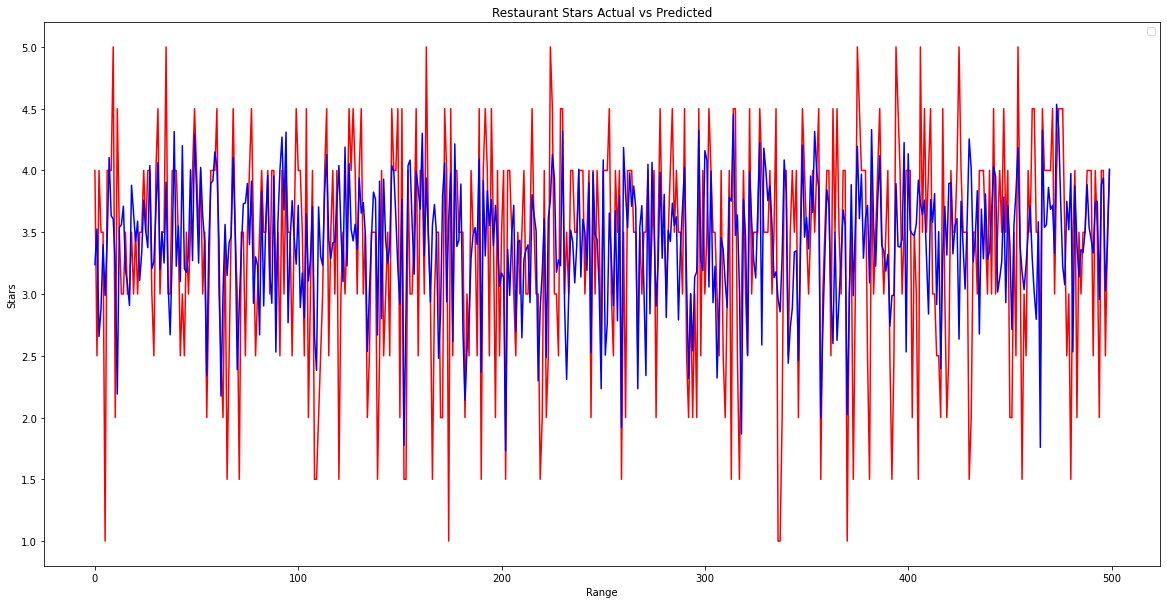

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.plot(range(len(rforest_df['Actual'].head(500))), rforest_df['Actual'].head(500), color = "red")
plt.plot(range(len(rforest_df['Predicted'].head(500))), rforest_df['Predicted'].head(500), color = "blue")
plt.xlabel("Range")
plt.ylabel("Stars")
plt.title("Restaurant Stars Actual vs Predicted")
plt.legend()
plt.savefig('line_graph.png')

In [34]:
feature_importance_df = pd.DataFrame(X_train.columns, columns=["Feature"])
feature_importance_df["Importance"] = random_forest.feature_importances_
feature_importance_df.sort_values('Importance', ascending=False, inplace=True)
#feature_importance_df = feature_importance_df.head(20)
feature_importance_df

,Feature,Importance
0,review_count,0.362741
15,NoiseLevel,0.068062
10,RestaurantsDelivery,0.049246
14,RestaurantsAttire,0.043898
8,Caters,0.040941
5,OutdoorSeating,0.039555
12,Alcohol,0.039482
7,RestaurantsPriceRange2,0.037685
6,RestaurantsReservations,0.035099
3,BikeParking,0.034689


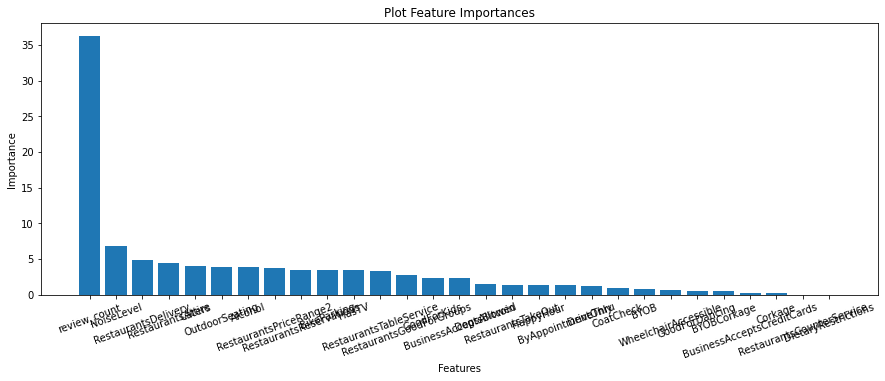

In [35]:
plt.figure(figsize=(15,5))
ax = feature_importance_df['Feature']
plt.bar(range(feature_importance_df.shape[0]), feature_importance_df['Importance']*100)
plt.xticks(range(feature_importance_df.shape[0]), feature_importance_df['Feature'], rotation = 20)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Plot Feature Importances")
plt.savefig('bar_graph.png')

In [36]:
#Encode the input Variables
def Encode(df_final):
    for column in df_final.columns[~df_final.columns.isin(['rate', 'votes'])]:
        df_final[column] = df_final[column].factorize()[0]
    return df_final

df_final_copy = Encode(df_final.copy())

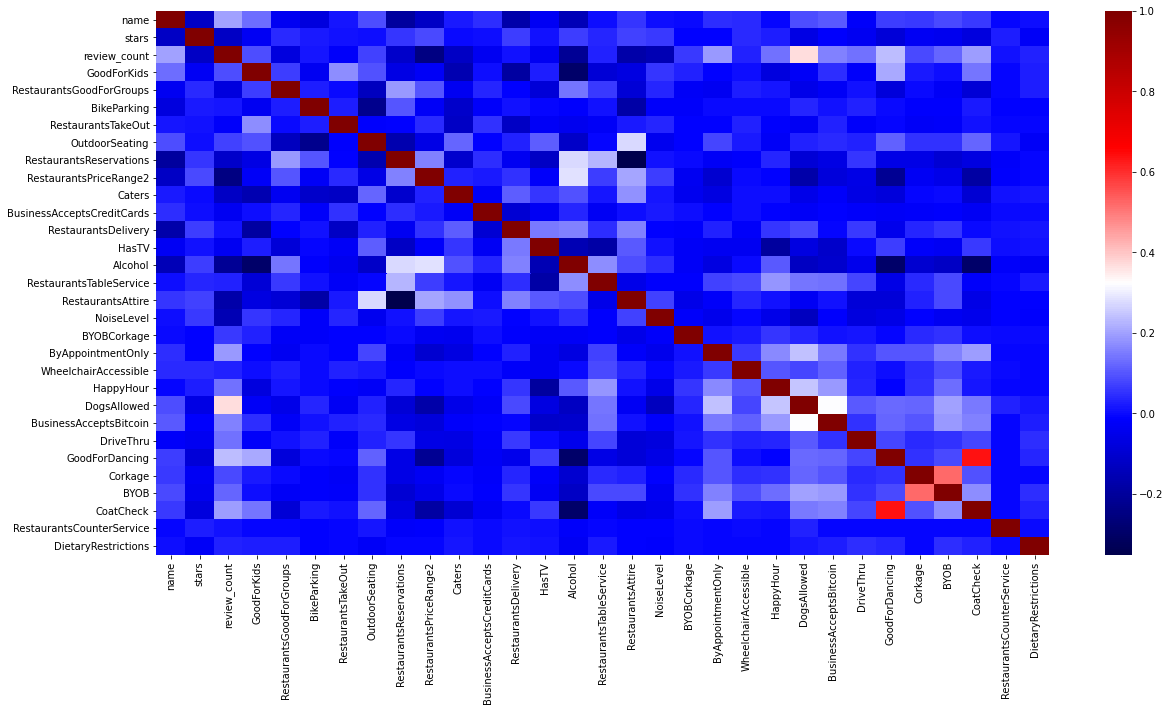

In [37]:
import seaborn as sns
plt.figure(figsize=(20,10))
sns.heatmap(data=df_final_copy.corr(), cmap="seismic")
plt.show()